In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
from IPython.display import display, HTML
from PIL import Image
import urllib.request
import random
from io import BytesIO

%matplotlib inline

In [4]:
ROOT_DIR = Path("raw_data")

In [3]:
# load parts.csv
inventory_parts = pd.read_csv(ROOT_DIR / "inventory_parts.csv")
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,False,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,False,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,False,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,False,NaN
4,1,stickerupn0077,9999,1,False,NaN


In [13]:
# count unique part_num
print("Unique part_num: ", inventory_parts["part_num"].nunique())
# count non unique part_num
print("Non unique part_num: ", inventory_parts["part_num"].count())
# count items that don't have img_url
print("Items without img_url: ", inventory_parts["img_url"].isna().sum())
# count items that have img_url
print("Items with img_url: ", inventory_parts["img_url"].count())

Unique part_num:  54599
Non unique part_num:  1301417
Items without img_url:  7040
Items with img_url:  1294377


In [ ]:
parts = pd.read_csv(ROOT_DIR / "parts.csv")
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


        inventory_id part_num  color_id  quantity  is_spare  \
15403            470   003402      9999         1     False   
26842            885   003402      9999         1     False   
400508         12659   003402      9999         1     False   

                                                  img_url  
15403   https://cdn.rebrickable.com/media/parts/photos...  
26842   https://cdn.rebrickable.com/media/parts/photos...  
400508  https://cdn.rebrickable.com/media/parts/photos...  


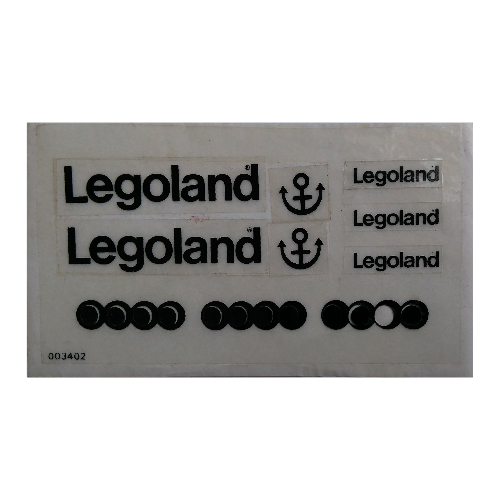

Sticker Sheet for Sets 310-3, 311-1, 312-3


In [ ]:
matches = inventory_parts[inventory_parts["part_num"] == "003402"]
print(matches)
# display first image
url = matches.iloc[0]["img_url"]
img = Image.open(urllib.request.urlopen(url))
display(img)
print(parts[parts["part_num"] == "003402"].iloc[0]["name"])

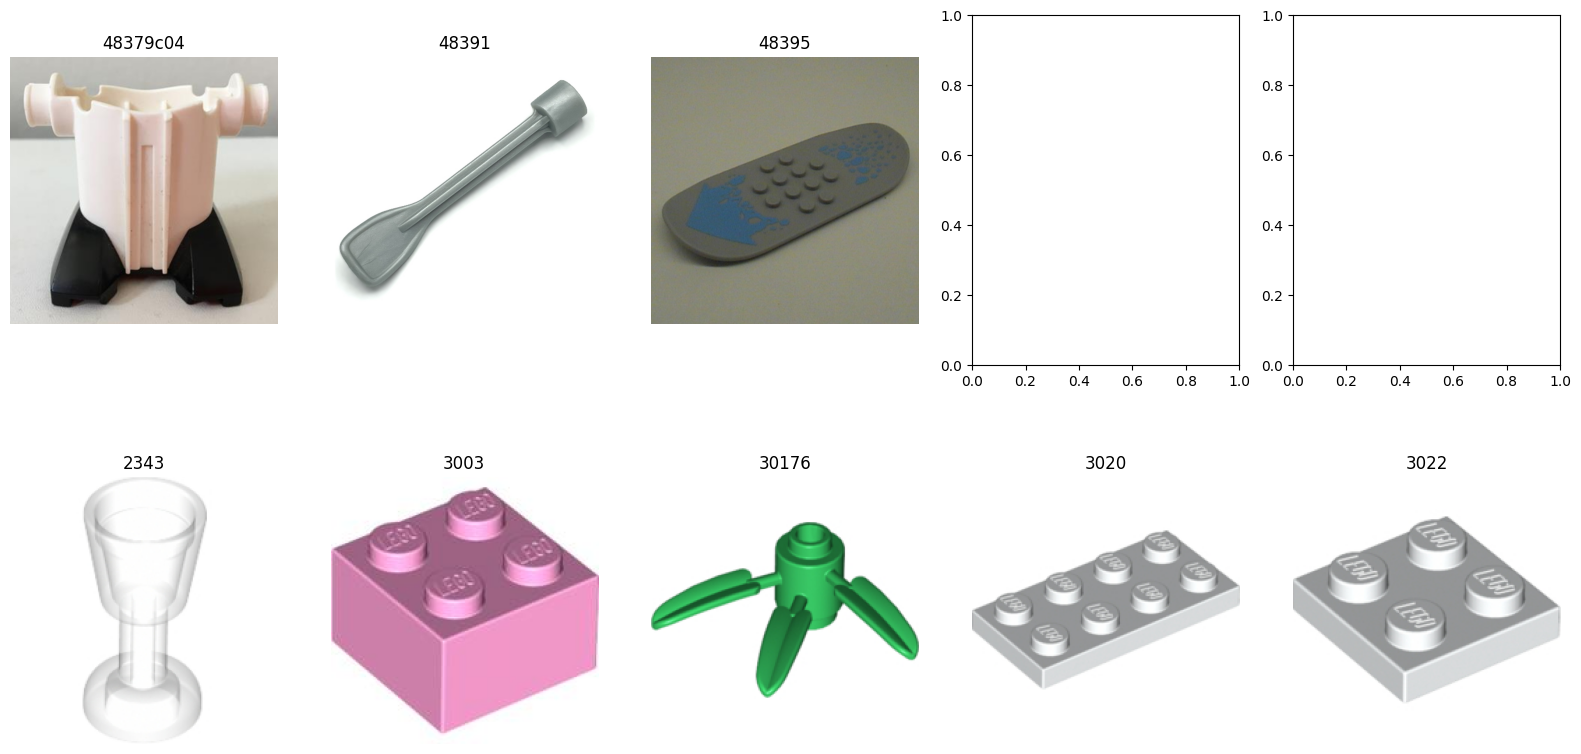

In [68]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < 10:
        url = inventory_parts["img_url"].iloc[i]
        if pd.isnull(url):
            continue
        with urllib.request.urlopen(url) as response:
            img = Image.open(response)
            ax.set_title(inventory_parts["part_num"].iloc[i])
            ax.imshow(img)
            ax.axis("off")

In [ ]:
colors = pd.read_csv(ROOT_DIR / "colors.csv")
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


In [103]:
categories = pd.read_csv(ROOT_DIR / "part_categories.csv")
categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [106]:
# find name for id 58
print(categories[categories["id"] == 58].iloc[0]["name"])

Stickers


In [5]:
minifigs = pd.read_csv(ROOT_DIR / "minifigs.csv")
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [5]:
# print number of rows
print("Number of minifigs: ", minifigs.shape[0])

Number of minifigs:  14985


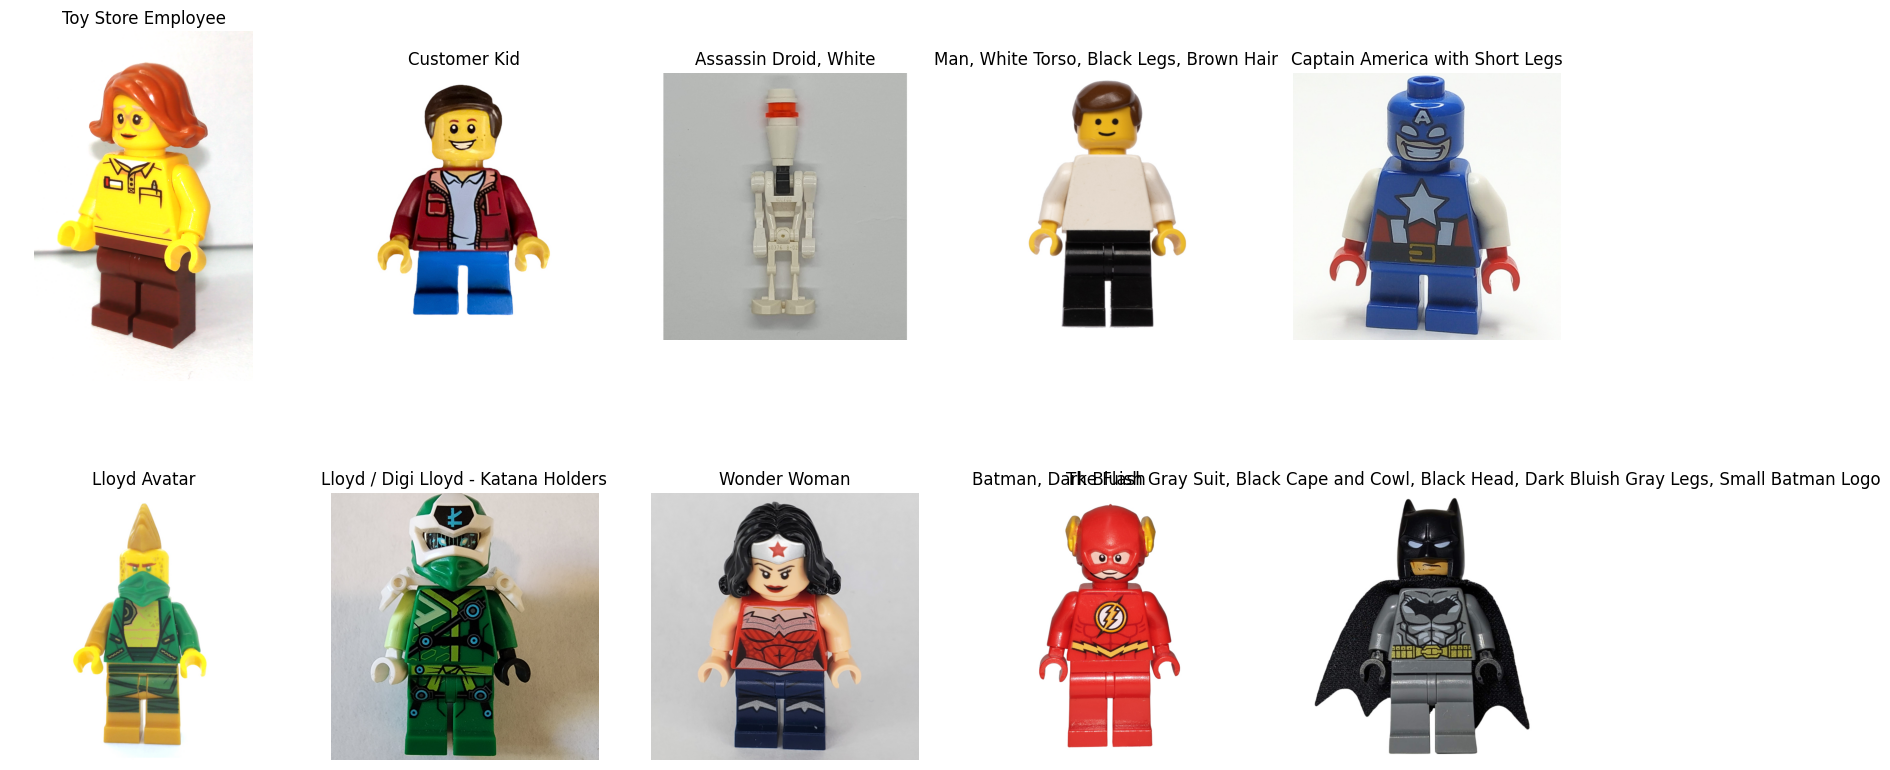

In [ ]:
# display the images for the first 10 minifigs in a 2xg grid with the name below
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < 10:
        url = minifigs["img_url"].iloc[i]
        with urllib.request.urlopen(url) as response:
            img = Image.open(response)
            ax.set_title(minifigs["name"].iloc[i])
            ax.imshow(img)
            ax.axis("off")

In [6]:
inventory_minifigs = pd.read_csv(ROOT_DIR / "inventory_minifigs.csv")
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


In [7]:
# print number of rows
print("Number of minifigs: ", minifigs.shape[0])

Number of minifigs:  14985


In [7]:
# add column inventory_id as a list of elements from inventory_minifigs to minifigs and store result
# in minifigs_final
minifigs_final = minifigs.copy()
minifigs_final["inventory_id"] = minifigs["fig_num"].apply(
    lambda x: inventory_minifigs[inventory_minifigs["fig_num"] == x]["inventory_id"].tolist()
)
minifigs_final.head()

,fig_num,name,num_parts,img_url,inventory_id
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...,[42484]
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...,[42484]
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...,"[15042, 126421]"
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...,"[1619, 2201, 2694, 3484, 3746, 4909, 8905, 110..."
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...,[10047]


In [8]:
minifigs_final.shape[0]

14985

In [37]:
test_url = minifigs_final["img_url"].iloc[0]
img = Image.open(urllib.request.urlopen(test_url))
buff = BytesIO()
img.save(buff, format="PNG")

# convert the image bytes to a hex string

test_res = {
    "bytes": buff.getvalue(),
}

In [38]:
test_res["bytes"][:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x17\x00\x00\x08$\x08\x02\x00\x00\x00\xaf\x1e\xd4\xd1\x00\x01\x00\x00IDATx\x9c\xec\xfdm\x8f\xecH\xae4\x08\x1aIW\xe6\xe9\xee]`\x81\xc1.\x06\x83\xdd\xff\xff\xe3\x16\xcf`\xe7CwW\xa6\x9c\xc6\xfd@\xfa\x8b""O\xd5\xa9\x97\xbe\xd5\xdd\xe2\xc5=\x1d\x19\xa1\x90\xdc'

In [40]:
# for the first 10 elements embed the image inside the dataframe
for i in range(10):
    url = minifigs_final["img_url"].iloc[i]
    with urllib.request.urlopen(url) as response:
        img = Image.open(response)
        buff = BytesIO()
        img.save(buff, format="PNG")
        # store the image bytes in the dataframe as {"bytes": b"...."}
        minifigs_final.at[i, "image"] = buff.getvalue()

In [41]:
# write minifigs_final as a parquet file, only the first 10 rows
minifigs_final[:10].to_parquet("minifigs_final.parquet")